Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4740 - loss: 1.1332 - val_accuracy: 0.9298 - val_loss: 0.4707
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8461 - loss: 0.5068 - val_accuracy: 0.9825 - val_loss: 0.2200
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8687 - loss: 0.4149 - val_accuracy: 0.9825 - val_loss: 0.1296
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9322 - loss: 0.2666 - val_accuracy: 1.0000 - val_loss: 0.0894
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9346 - loss: 0.2385 - val_accuracy: 1.0000 - val_loss: 0.0722
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9321 - loss: 0.2274 - val_accuracy: 1.0000 - val_loss: 0.0598
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9485 - loss: 0.1933 - val_accuracy: 1.0000 - val_loss: 0.0507
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9322 - loss: 0.1781 - val_accuracy: 1.0000 - val_loss: 0.0489
Ep

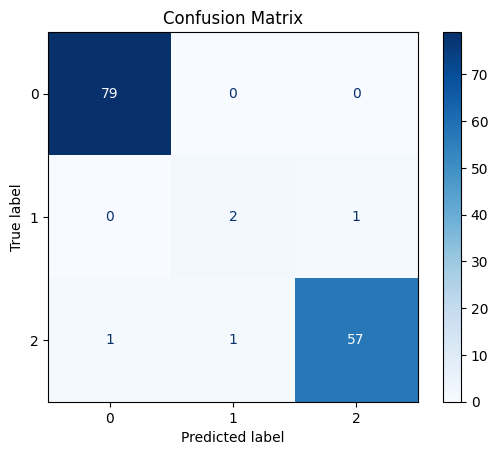

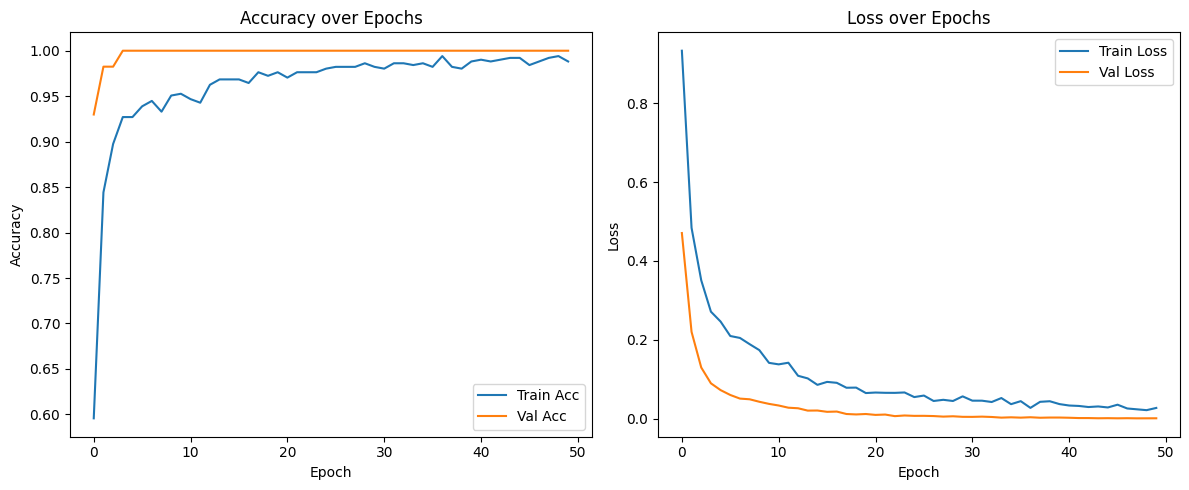


--- Predict Student's Social Media Addiction Level ---
Enter numeric value for 'Age': 16
Enter numeric value for 'Gender': male
Invalid input for Gender. Using 0 by default.
Enter numeric value for 'Academic_Level': 78
Enter numeric value for 'Country': 3627
Enter numeric value for 'Avg_Daily_Usage_Hours': 9
Enter numeric value for 'Most_Used_Platform': 0
Enter numeric value for 'Affects_Academic_Performance': 76
Enter numeric value for 'Sleep_Hours_Per_Night': 8
Enter numeric value for 'Mental_Health_Score': 67
Enter numeric value for 'Relationship_Status': 0
Enter numeric value for 'Conflicts_Over_Social_Media': 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

✅ Predicted Addiction Level: **0**
Prediction Confidence: 100.00%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("/content/Students Social Media Addiction.csv")  # Update path as needed

# Drop ID column if present
if 'Student_ID' in df.columns:
    df.drop(columns=['Student_ID'], inplace=True)

# Create target variable
def addiction_level(score):
    if score <= 3:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Addiction_Level'] = df['Addicted_Score'].apply(addiction_level)
df.drop(columns=['Addicted_Score'], inplace=True)

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop(columns=['Addiction_Level'])
y = df['Addiction_Level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target to categorical
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# --- Build Deep Learning Model ---
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # 3 classes: Low, Medium, High

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Train Model ---
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# --- Evaluate Model ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# --- Classification Report ---
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Explicitly create a list of strings for target_names
target_names_list = [str(cls) for cls in le_target.classes_]

print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names_list))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# --- Plot Accuracy and Loss ---
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

def predict_addiction_from_input():
    print("\n--- Predict Student's Social Media Addiction Level ---")

    # Collect user input for each feature
    user_input = {}
    for col in X.columns:
        dtype = df[col].dtype

        if dtype == 'int64' or dtype == 'float64':
            val = input(f"Enter numeric value for '{col}': ")
            try:
                user_input[col] = float(val)
            except ValueError:
                print(f"Invalid input for {col}. Using 0 by default.")
                user_input[col] = 0.0
        else:
            categories = label_encoders[col].classes_
            print(f"Possible options for '{col}': {list(categories)}")
            val = input(f"Enter category for '{col}': ")
            if val not in categories:
                print(f"Invalid input for {col}. Using first category by default.")
                val = categories[0]
            user_input[col] = label_encoders[col].transform([val])[0]

    # Convert dict to DataFrame
    user_df = pd.DataFrame([user_input])

    # Scale numeric values
    user_scaled = scaler.transform(user_df)

    # Predict
    prediction_prob = model.predict(user_scaled)
    predicted_class_index = np.argmax(prediction_prob)
    predicted_class_label = le_target.inverse_transform([predicted_class_index])[0]

    print(f"\n✅ Predicted Addiction Level: **{predicted_class_label}**")
    print(f"Prediction Confidence: {np.max(prediction_prob) * 100:.2f}%")

# Call the function if desired
predict_addiction_from_input()
